In [1]:
%load_ext autoreload
%autoreload 2

import os 
import sys

project_dir_path = '/home/onoue/ws/lukasiewicz_1'
sys.path.append(project_dir_path)

print(sys.path)


from src.setup_problem_modular import Setup
from src.objective_function import specimen_construct_objective_function
from src.misc import visualize_result

import cvxpy as cp

from src.misc import *

['/home/onoue/ws/lukasiewicz_1/notebooks/toy_problem', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/onoue/ws/lukasiewicz_1/myenv/lib/python3.10/site-packages', '/home/onoue/ws/lukasiewicz_1']


In [3]:
file_names_dict = {
    "supervised": ["L_p1.csv", "L_p2.csv", "L_p3.csv"],
    "unsupervised": ["U.csv"],
    "rule": ["rules.txt"]
}

data_dir_path = './../../inputs/toy_data'

problem_instance = Setup(data_dir_path, file_names_dict, specimen_construct_objective_function)
objective, constraints = problem_instance.main(c1=10, c2=10)

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)

load_data took 0.08519387245178223 seconds!
load_rules took 0.0010287761688232422 seconds!
specimen_construct_objective_function took 0.004443645477294922 seconds!
pointwise constraints
logical constraints
consistency constraints
__call__ took 0.05170392990112305 seconds!
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Dec 21 04:12:13 PM: Your problem has 23 variables, 96 constraints, and 0 parameters.
(CVXPY) Dec 21 04:12:13 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 21 04:12:13 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 21 04:12:13 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation     

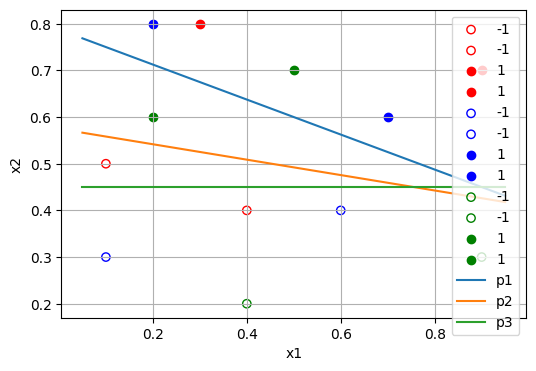

In [4]:
visualize_result(problem_instance)

In [5]:
problem_instance.w_j.value

array([[ 7.50000000e-01,  2.00000000e+00, -1.07500000e+00],
       [ 3.19767438e-01,  1.93604651e+00, -6.12790698e-01],
       [ 1.09409846e-10,  2.00000000e+00, -4.00000000e-01]])

In [13]:
def test_trained_predicate(predicates_dict, test_data_dict):
    result_dict = {}
    p_names = predicates_dict.keys()

    for p_name in p_names:
        pred_vals = []
        preds = []

        p = predicates_dict[p_name]
        test_data = test_data_dict[p_name]

        cnt = 0

        for data in test_data:
            x, ans = data[:-1], data[-1]
            pred_val = p(x).value
            pred_vals.append(pred_val)

            if (pred_val >= 0.5 and ans == 1) or (pred_val < 0.5 and ans == -1):
                cnt += 1

            pred = (pred_val >= 0.5 and ans == 1) or (pred_val < 0.5 and ans == -1)
            preds.append(pred)

        p_arr = np.hstack([test_data, 
                           np.array(pred_vals).reshape(-1,1), 
                           np.array(preds).reshape(-1, 1)])

        result_dict[p_name] = p_arr

        print(cnt)
        print(f'Accuracy of {p_name}: {cnt / len(test_data)}')

    return result_dict

In [7]:
problem_instance.predicates_dict

{'p1(x)': <src.misc.Predicate at 0x7f434f9c7250>,
 'p2(x)': <src.misc.Predicate at 0x7f434f1cbe90>,
 'p3(x)': <src.misc.Predicate at 0x7f434f1e8190>}

In [8]:
problem_instance.L

{'p1(x)': array([[ 0.1,  0.5, -1. ],
        [ 0.4,  0.4, -1. ],
        [ 0.3,  0.8,  1. ],
        [ 0.9,  0.7,  1. ]]),
 'p2(x)': array([[ 0.1,  0.3, -1. ],
        [ 0.6,  0.4, -1. ],
        [ 0.2,  0.8,  1. ],
        [ 0.7,  0.6,  1. ]]),
 'p3(x)': array([[ 0.4,  0.2, -1. ],
        [ 0.9,  0.3, -1. ],
        [ 0.2,  0.6,  1. ],
        [ 0.5,  0.7,  1. ]])}

In [15]:
p_dict = problem_instance.predicates_dict
test_data = problem_instance.L

res_dict = test_trained_predicate(p_dict, test_data)

4
Accuracy of p1(x): 1.0
4
Accuracy of p2(x): 1.0
4
Accuracy of p3(x): 1.0


In [17]:
pd.DataFrame(res_dict['p1(x)'])

,0,1,2,3,4
0,0.1,0.5,-1.0,1.046663e-10,1.0
1,0.4,0.4,-1.0,2.500000e-02,1.0
2,0.3,0.8,1.0,7.500000e-01,1.0
3,0.9,0.7,1.0,1.000000e+00,1.0


In [41]:
cnt = 0
cnt_violation = 0

for data in problem_instance.S:
    for x in data:
        val = problem_instance.predicates_dict['p_1(x)'](x).value

        if val < 0:
            cnt_violation += 1
        print(val)

        cnt += 1

print(f'\n violations: {cnt_violation} out of {cnt}')

1.8977408533515927e-10
0.02202231900646834
0.496573718191177
0.672043493676458
1.8977408533515927e-10
0.3651485803392841
0.07317147122933065
0.0951937900460248
0.014917804416994529
0.46034237019553503
-0.26285027551401136
0.12432062345219297
0.4454245659683146
0.43832005137884067
1.8977408533515927e-10
0.3651485803392841
0.07317147122933065
0.0951937900460248
0.014917804416994529
0.46034237019553503
-0.2408279566973171
0.14634294226888722
0.1825742902645291
0.46744688478500873
1.8977408533515927e-10
0.3651485803392841
0.07317147122933065
0.0951937900460248
0.014917804416994529
0.46034237019553503

 violations: 2 out of 30
